In [11]:
# Importin Libraries

import pandas as pd # Data manipulation
import numpy as np # Matrix calculation
import geopandas as gpd # GIS of Pandas
import seaborn as sb # Parof of matplotlib for Data Viz
import matplotlib.pyplot as plt # data viz

# ETL (Extract, Tranform, Load)

### Data Extraction

In [12]:
# Reading 2000-2023 Aggregated Yield Data
df_agg_00_23=pd.read_csv('/Users/Juliana Adeola Adisa/Downloads/Streem3/FinalProject/rm_yield_00_23_major_crops.csv')

# Reading GIS
gdf_rm=gpd.read_file('/Users/Juliana Adeola Adisa/Downloads/Streem3/FinalProject/RM_shapefile/RuralMunicipality.shp')

# Changing data type 
gdf_rm['RMNO']=gdf_rm['RMNO'].astype(int)
gdf_rm_clean=gdf_rm[['RMNO', 'geometry']].rename(columns={'RMNO': 'RM'})



"""
directory_main = '/Users/Juliana Adeola Adisa/Downloads/Streem3/FinalProject/'
# Yield
directory_rm_yields = directory_main + 'rm-yields-data.csv'
#GIS
directory_gis= directory_main + 'RM_shapefile/RuralMunicipality.shp'
"""

"\ndirectory_main = '/Users/Juliana Adeola Adisa/Downloads/Streem3/FinalProject/'\n# Yield\ndirectory_rm_yields = directory_main + 'rm-yields-data.csv'\n#GIS\ndirectory_gis= directory_main + 'RM_shapefile/RuralMunicipality.shp'\n"

In [13]:
print(df_agg_00_23.head())

   RM  Canola_mean  Canola_std  Spring Wheat_mean  Spring Wheat_std  \
0   1    28.314583    7.251919          38.569130          9.937700   
1   2    29.668750    5.456009          38.728261          8.209199   
2   3    27.938750    6.955191          37.818750          8.898998   
3   4    26.847917    6.624128          34.304583          8.999300   
4   5    26.401667    7.654146          31.305000          7.488937   

   Durum_mean  Durum_std  Oats_mean   Oats_std  Lentils_mean  Lentils_std  \
0   29.716000   5.769946  68.702917  21.210231     11.716667     0.589256   
1   36.761250  12.107829  65.697917  15.301719     18.819643     9.439195   
2   38.888750   8.297462  61.715417   9.990864     15.459217     7.746315   
3   34.329583  10.130348  53.237619  17.791265     21.702795     7.636129   
4   34.202083   9.808930  51.038462  15.160395     19.988108     5.764766   

   Peas_mean  Peas_std  Barley_mean  Barley_std  
0  34.991667  9.203351    57.301739   18.607237  
1  34.0916

# ML Modelling

## Spectral Clustering

### Optimal Clusters recommeded by the scores

Optimal number of clusters for Canola: 3
Silhouette scores for Canola: [0.3814564205490793, 0.3885877047664673, 0.34565486635512543, 0.34463118890434563, 0.33653937502511105, 0.3380305645724174, 0.3429252134086174, 0.32087673456199095, 0.2979354631712626]


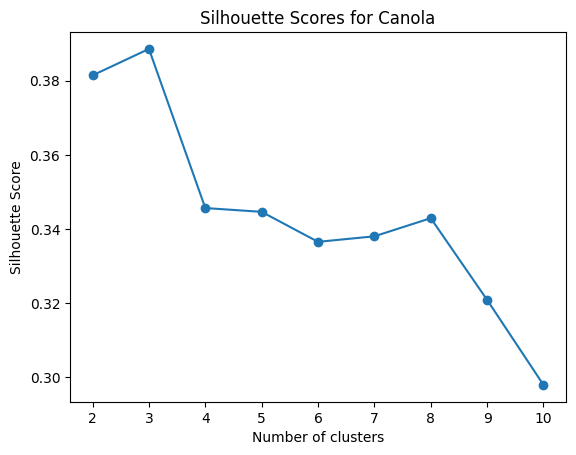

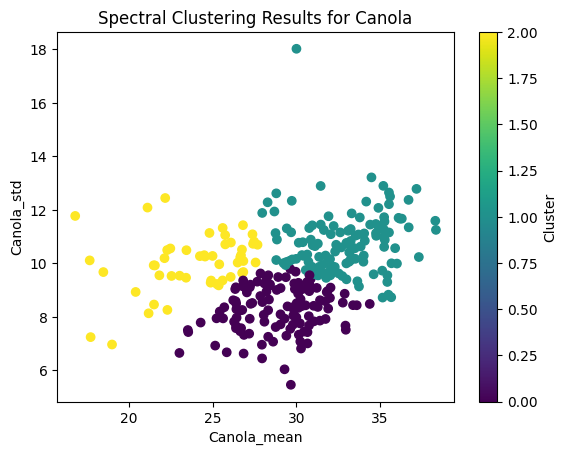

Optimal number of clusters for Spring Wheat: 2
Silhouette scores for Spring Wheat: [0.4526454016915555, 0.40982051487776133, 0.38881110650149964, 0.3903372028919639, 0.3099674793795712, 0.30642903599774574, 0.31689726794404316, 0.2904913458220534, 0.3050460100568113]


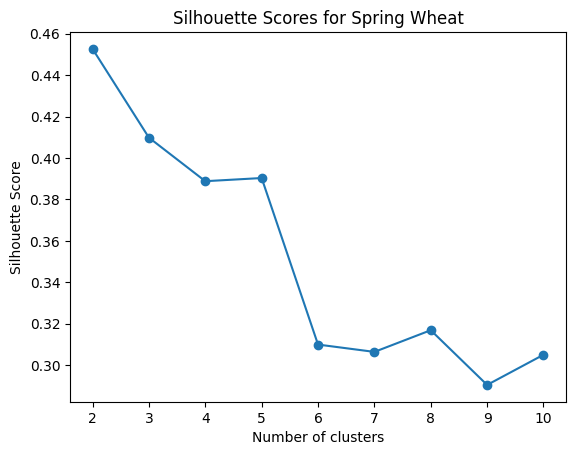

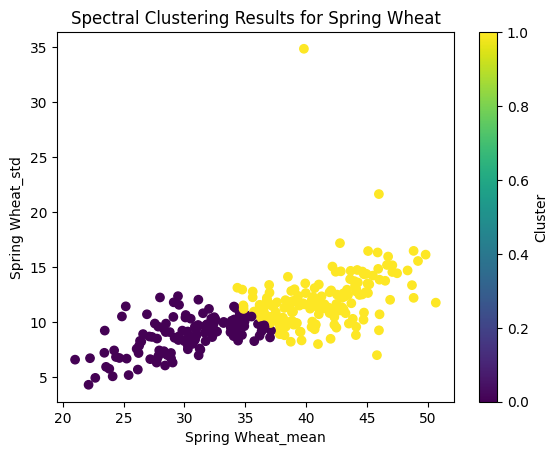

Optimal number of clusters for Durum: 2
Silhouette scores for Durum: [0.6284451116000132, 0.6091423890912017, 0.509376286529849, 0.5153683489872898, 0.40338893868238734, 0.3509118088721234, 0.3608837374922696, 0.31170820336514277, 0.30956361590996057]


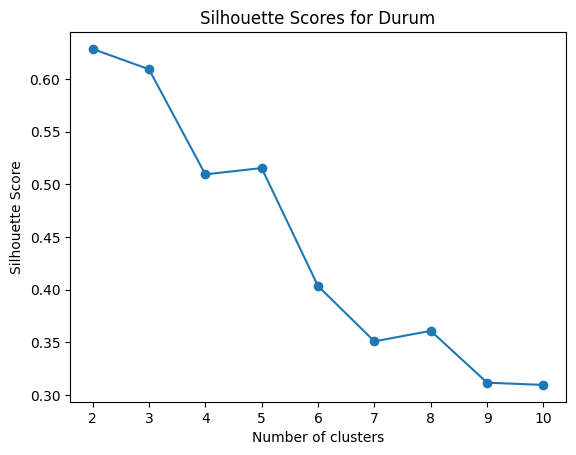

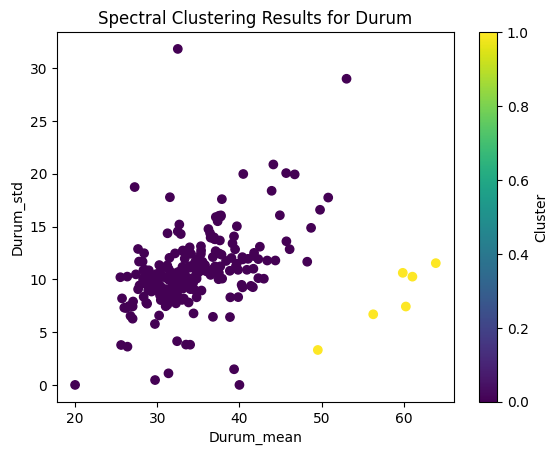

Optimal number of clusters for Oats: 2
Silhouette scores for Oats: [0.4861185821587076, 0.3596263835337619, 0.3952967598647857, 0.3601939538593756, 0.3809608620731302, 0.385973195832522, 0.3684356733239781, 0.3726271245577918, 0.36971141264202095]


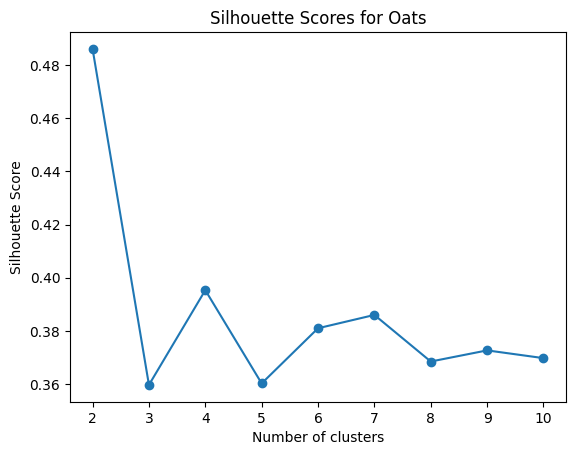

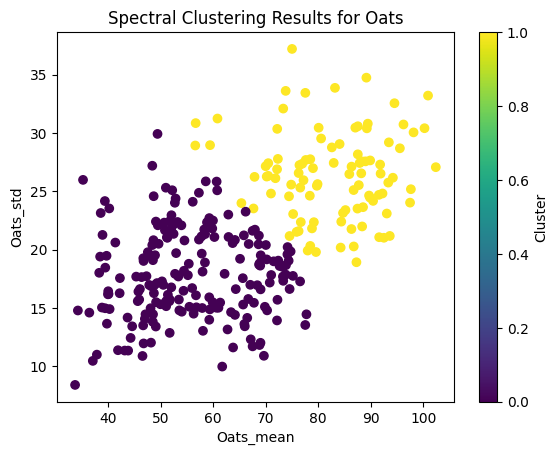

Optimal number of clusters for Lentils: 2
Silhouette scores for Lentils: [0.6312110374398491, 0.5815591963529849, 0.4949970499549356, 0.5407099788067901, 0.4961548034240658, 0.4570470006130131, 0.42850791823059353, 0.44935701846077736, 0.3891888626948434]


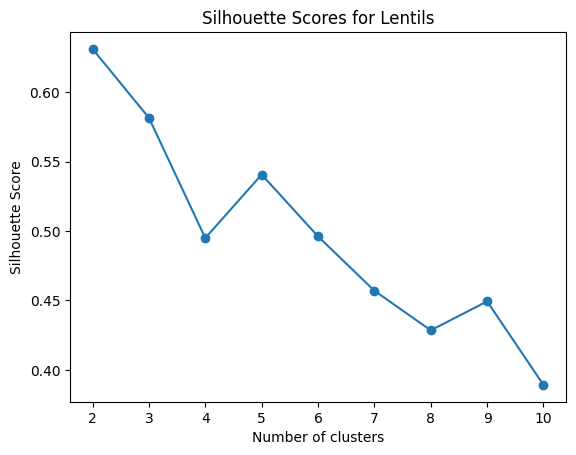

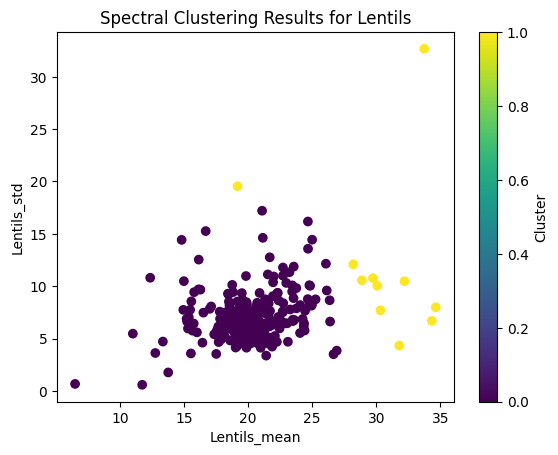

Optimal number of clusters for Peas: 2
Silhouette scores for Peas: [0.4181693484474844, 0.4112574865372375, 0.4112574865372375, 0.3516425590919209, 0.3078804024848918, 0.29754831335725, 0.3183047600348066, 0.27505129584610627, 0.2580777371247389]


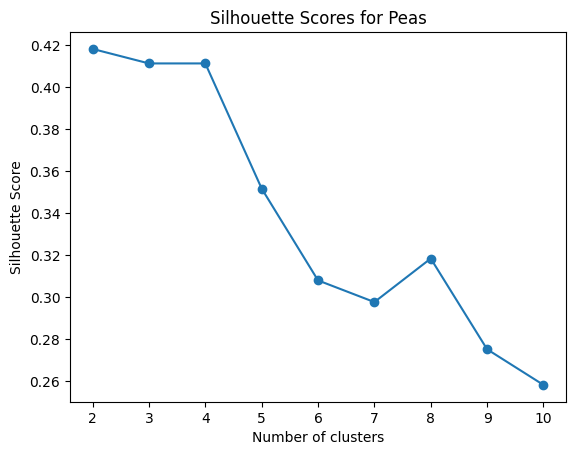

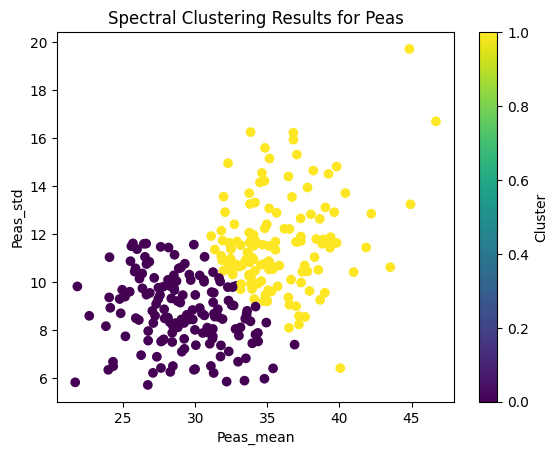

Optimal number of clusters for Barley: 2
Silhouette scores for Barley: [0.36701503848619343, 0.3348533092557515, 0.35587068730107074, 0.33419606793807277, 0.349010098057453, 0.35693409598836556, 0.323058637873144, 0.32330991761984323, 0.34235735762646646]


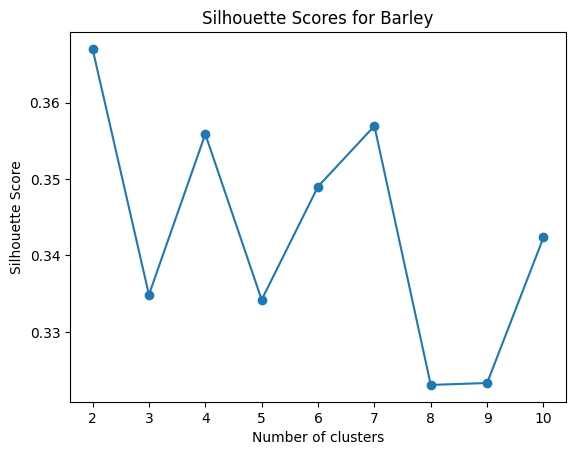

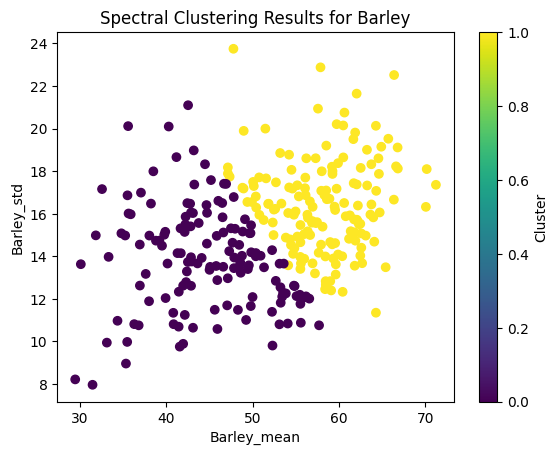

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Assuming df_agg_00_23 is already loaded
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    return crop_data

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Function to perform spectral clustering and choose the optimal number of clusters
def spectral_clustering(data, n_clusters):
    clustering = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize", random_state=0)
    labels = clustering.fit_predict(data)
    return labels

# Function to find the optimal number of clusters
def find_optimal_clusters(data, max_k):
    scores = []
    for k in range(2, max_k+1):
        labels = spectral_clustering(data, k)
        score = silhouette_score(data, labels)
        scores.append(score)
    optimal_k = scores.index(max(scores)) + 2
    return optimal_k, scores

# Iterate over each crop and perform clustering
for crop in crops:
    # Prepare the data for the crop
    crop_data = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Find the optimal number of clusters
    optimal_k, scores = find_optimal_clusters(crop_data_scaled, 10)
    
    # Perform spectral clustering with the optimal number of clusters
    labels = spectral_clustering(crop_data_scaled, optimal_k)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_Spectral_Cluster_Optimal'] = np.nan
    df_agg_00_23.loc[~df_agg_00_23[[f'{crop}_mean', f'{crop}_std']].isna().any(axis=1), f'{crop}_Spectral_Cluster_Optimal'] = labels
    
    # Print the results
    print(f'Optimal number of clusters for {crop}: {optimal_k}')
    print(f'Silhouette scores for {crop}: {scores}')
    
    # Visualize the silhouette scores
    plt.plot(range(2, 11), scores, marker='o')
    plt.title(f'Silhouette Scores for {crop}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    # Visualize the clustering results
    plt.scatter(df_agg_00_23[f'{crop}_mean'], df_agg_00_23[f'{crop}_std'], c=df_agg_00_23[f'{crop}_Spectral_Cluster_Optimal'], cmap='viridis')
    plt.title(f'Spectral Clustering Results for {crop}')
    plt.xlabel(f'{crop}_mean')
    plt.ylabel(f'{crop}_std')
    plt.colorbar(label='Cluster')
    plt.show()

### Customized Clusters by Expert

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering

# Assuming df_agg_00_23 is already loaded
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    return crop_data, df[columns].dropna().index

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Perform spectral clustering with a fixed number of clusters
def perform_spectral_clustering(data, n_clusters=5):
    clustering = SpectralClustering(n_clusters=n_clusters, assign_labels="discretize", random_state=0)
    labels = clustering.fit_predict(data)
    return labels

# Iterate over each crop and perform clustering
for crop in crops:
    # Prepare the data for the crop
    crop_data, indices = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Perform spectral clustering with 5 clusters
    labels = perform_spectral_clustering(crop_data_scaled, 5)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_Spectral_Cluster_Custom'] = np.nan
    df_agg_00_23.loc[indices, f'{crop}_Spectral_Cluster_Custom'] = labels

## K-Means Clustering

### Raw Clusters

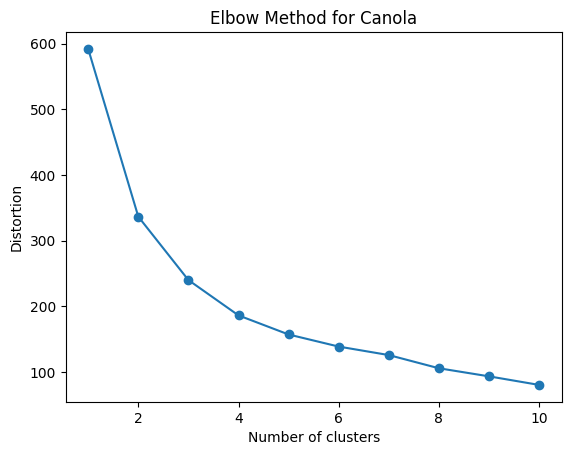

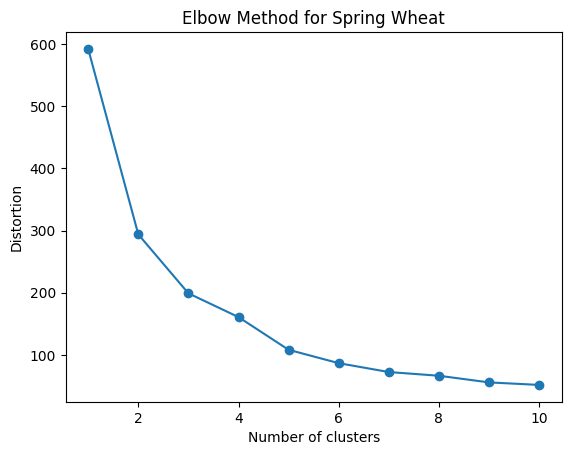

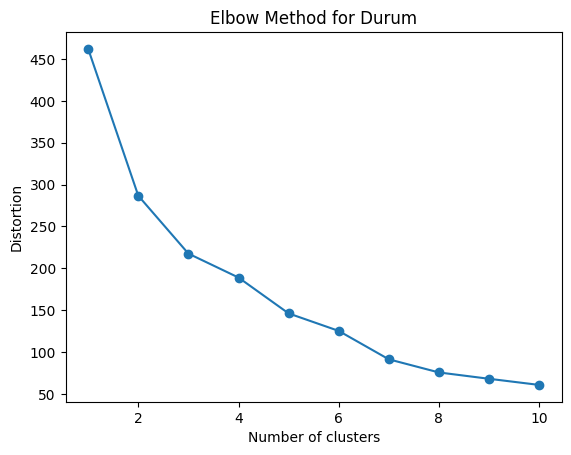

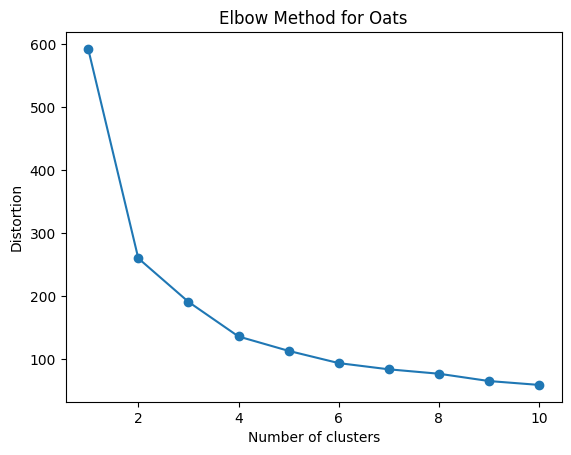

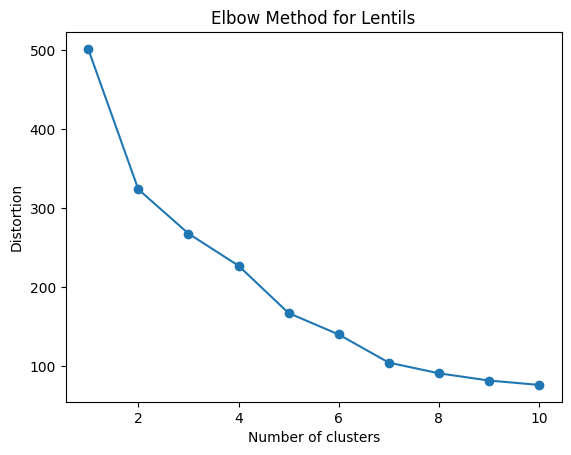

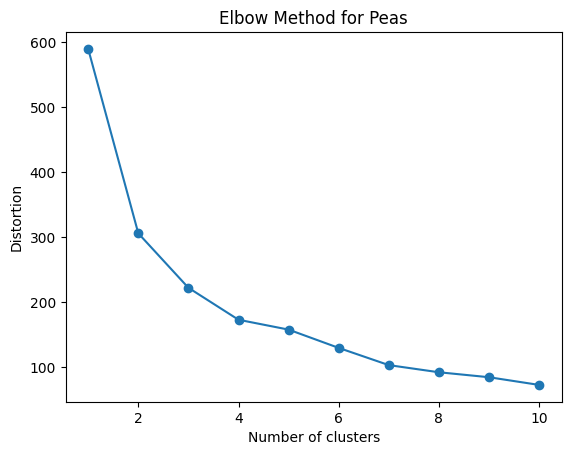

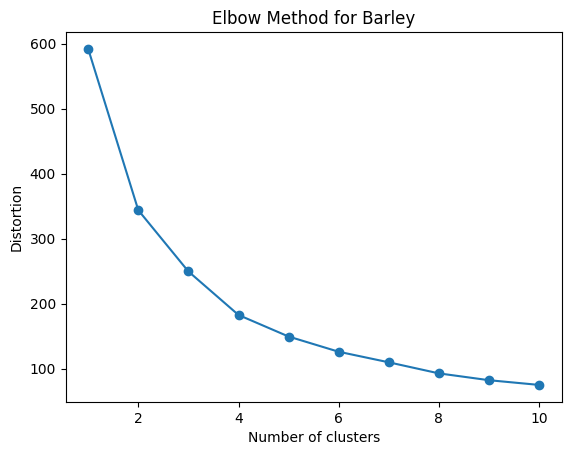

,RM,Canola_mean,Canola_std,Spring Wheat_mean,Spring Wheat_std,Durum_mean,Durum_std,Oats_mean,Oats_std,Lentils_mean,...,Durum_KMeans_Cluster_Optimal,Durum_KMeans_Cluster_Custom,Oats_KMeans_Cluster_Optimal,Oats_KMeans_Cluster_Custom,Lentils_KMeans_Cluster_Optimal,Lentils_KMeans_Cluster_Custom,Peas_KMeans_Cluster_Optimal,Peas_KMeans_Cluster_Custom,Barley_KMeans_Cluster_Optimal,Barley_KMeans_Cluster_Custom
0,1,28.314583,7.251919,38.569130,9.937700,29.716000,5.769946,68.702917,21.210231,11.716667,...,1.0,3.0,1.0,0.0,9.0,0.0,1.0,4.0,2.0,2.0
1,2,29.668750,5.456009,38.728261,8.209199,36.761250,12.107829,65.697917,15.301719,18.819643,...,3.0,0.0,3.0,4.0,1.0,2.0,1.0,4.0,4.0,0.0
2,3,27.938750,6.955191,37.818750,8.898998,38.888750,8.297462,61.715417,9.990864,15.459217,...,0.0,0.0,3.0,4.0,0.0,0.0,9.0,1.0,4.0,0.0
3,4,26.847917,6.624128,34.304583,8.999300,34.329583,10.130348,53.237619,17.791265,21.702795,...,3.0,1.0,4.0,2.0,4.0,2.0,9.0,1.0,4.0,1.0
4,5,26.401667,7.654146,31.305000,7.488937,34.202083,9.808930,51.038462,15.160395,19.988108,...,3.0,1.0,4.0,2.0,8.0,2.0,9.0,1.0,9.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,520,31.642917,11.245617,41.914167,12.705160,NaN,NaN,89.890952,27.648040,11.116667,...,NaN,NaN,9.0,3.0,NaN,NaN,5.0,3.0,9.0,3.0
292,555,34.171765,12.309706,45.965385,21.635478,NaN,NaN,74.849412,25.576126,NaN,...,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,3.0,2.0
293,561,33.493636,10.563191,44.946087,14.381770,NaN,NaN,77.994500,19.927426,21.083333,...,NaN,NaN,8.0,0.0,2.0,1.0,5.0,3.0,2.0,2.0
294,588,31.999583,9.736271,44.596250,12.508024,31.250000,14.361407,78.482917,20.325299,20.659524,...,2.0,0.0,8.0,0.0,4.0,2.0,1.0,4.0,0.0,3.0


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df_agg_00_23 is already loaded
crops = ['Canola', 'Spring Wheat', 'Durum', 'Oats', 'Lentils', 'Peas', 'Barley']

# Function to prepare data for each crop
def prepare_data_for_crop(df, crop):
    columns = [f'{crop}_mean', f'{crop}_std']
    crop_data = df[columns].dropna().values
    return crop_data, df[columns].dropna().index

# Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    return data_scaled

# Function to perform K-Means clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    return labels

# Function to find the optimal number of clusters using the Elbow method
def find_optimal_clusters(data, max_k):
    distortions = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    optimal_k = distortions.index(min(distortions[1:])) + 1
    return optimal_k, distortions

# Iterate over each crop and perform clustering
for crop in crops:
    # Prepare the data for the crop
    crop_data, indices = prepare_data_for_crop(df_agg_00_23, crop)
    
    # Standardize the data
    crop_data_scaled = standardize_data(crop_data)
    
    # Find the optimal number of clusters using the Elbow method
    optimal_k, distortions = find_optimal_clusters(crop_data_scaled, 10)
    
    # Perform K-Means clustering with the optimal number of clusters
    optimal_labels = kmeans_clustering(crop_data_scaled, optimal_k)
    
    # Perform K-Means clustering with 5 clusters
    fixed_labels = kmeans_clustering(crop_data_scaled, 5)
    
    # Add the cluster labels to the original dataframe
    df_agg_00_23[f'{crop}_KMeans_Cluster_Optimal'] = np.nan
    df_agg_00_23[f'{crop}_KMeans_Cluster_Custom'] = np.nan
    df_agg_00_23.loc[indices, f'{crop}_KMeans_Cluster_Optimal'] = optimal_labels
    df_agg_00_23.loc[indices, f'{crop}_KMeans_Cluster_Custom'] = fixed_labels
    
    # Plot the Elbow method graph
    plt.plot(range(1, 11), distortions, marker='o')
    plt.title(f'Elbow Method for {crop}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

# Display the dataframe with the new cluster columns
df_agg_00_23

### Ranking Clusters

In [17]:


# List of crops and corresponding cluster columns
crops_clusters = {
    'Canola': ['Canola_Spectral_Cluster_Optimal', 'Canola_Spectral_Cluster_Custom', 'Canola_KMeans_Cluster_Optimal', 'Canola_KMeans_Cluster_Custom'],
    'Spring Wheat': ['Spring Wheat_Spectral_Cluster_Optimal', 'Spring Wheat_Spectral_Cluster_Custom', 'Spring Wheat_KMeans_Cluster_Optimal', 'Spring Wheat_KMeans_Cluster_Custom'],
    'Durum': ['Durum_Spectral_Cluster_Optimal', 'Durum_Spectral_Cluster_Custom', 'Durum_KMeans_Cluster_Optimal', 'Durum_KMeans_Cluster_Custom'],
    'Oats': ['Oats_Spectral_Cluster_Optimal', 'Oats_Spectral_Cluster_Custom', 'Oats_KMeans_Cluster_Optimal', 'Oats_KMeans_Cluster_Custom'],
    'Lentils': ['Lentils_Spectral_Cluster_Optimal', 'Lentils_Spectral_Cluster_Custom', 'Lentils_KMeans_Cluster_Optimal', 'Lentils_KMeans_Cluster_Custom'],
    'Peas': ['Peas_Spectral_Cluster_Optimal', 'Peas_Spectral_Cluster_Custom', 'Peas_KMeans_Cluster_Optimal', 'Peas_KMeans_Cluster_Custom'],
    'Barley': ['Barley_Spectral_Cluster_Optimal', 'Barley_Spectral_Cluster_Custom', 'Barley_KMeans_Cluster_Optimal', 'Barley_KMeans_Cluster_Custom']
}

# Initialize a new DataFrame for ranked columns
df_agg_00_23_ranked = df_agg_00_23.copy()

# Rank the clusters based on the mean crop yield for each crop
for crop, clusters in crops_clusters.items():
    mean_column = f'{crop}_mean'
    
    for cluster_col in clusters:
        # Calculate the mean crop yield grouped by the cluster column
        cluster_means = df_agg_00_23.groupby(cluster_col).mean()[mean_column]
        
        # Rank the clusters based on the mean crop yield
        df_agg_00_23_ranked[f'{cluster_col}_ranked'] = df_agg_00_23[cluster_col].map(cluster_means.rank(method='min'))

# Drop old unranked cluster columns
for clusters in crops_clusters.values():
    df_agg_00_23_ranked.drop(columns=clusters, inplace=True)


In [18]:
# Display the dataframe with the new cluster column
df_agg_00_23_ranked

,RM,Canola_mean,Canola_std,Spring Wheat_mean,Spring Wheat_std,Durum_mean,Durum_std,Oats_mean,Oats_std,Lentils_mean,...,Lentils_KMeans_Cluster_Optimal_ranked,Lentils_KMeans_Cluster_Custom_ranked,Peas_Spectral_Cluster_Optimal_ranked,Peas_Spectral_Cluster_Custom_ranked,Peas_KMeans_Cluster_Optimal_ranked,Peas_KMeans_Cluster_Custom_ranked,Barley_Spectral_Cluster_Optimal_ranked,Barley_Spectral_Cluster_Custom_ranked,Barley_KMeans_Cluster_Optimal_ranked,Barley_KMeans_Cluster_Custom_ranked
0,1,28.314583,7.251919,38.569130,9.937700,29.716000,5.769946,68.702917,21.210231,11.716667,...,1.0,1.0,2.0,3.0,8.0,3.0,2.0,5.0,9.0,5.0
1,2,29.668750,5.456009,38.728261,8.209199,36.761250,12.107829,65.697917,15.301719,18.819643,...,3.0,2.0,2.0,3.0,8.0,3.0,1.0,3.0,6.0,3.0
2,3,27.938750,6.955191,37.818750,8.898998,38.888750,8.297462,61.715417,9.990864,15.459217,...,2.0,1.0,1.0,2.0,5.0,2.0,1.0,3.0,6.0,3.0
3,4,26.847917,6.624128,34.304583,8.999300,34.329583,10.130348,53.237619,17.791265,21.702795,...,7.0,2.0,1.0,2.0,5.0,2.0,1.0,3.0,6.0,1.0
4,5,26.401667,7.654146,31.305000,7.488937,34.202083,9.808930,51.038462,15.160395,19.988108,...,4.0,2.0,1.0,2.0,5.0,2.0,2.0,4.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,520,31.642917,11.245617,41.914167,12.705160,NaN,NaN,89.890952,27.648040,11.116667,...,NaN,NaN,2.0,3.0,7.0,4.0,2.0,4.0,7.0,4.0
292,555,34.171765,12.309706,45.965385,21.635478,NaN,NaN,74.849412,25.576126,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,3.0,5.0
293,561,33.493636,10.563191,44.946087,14.381770,NaN,NaN,77.994500,19.927426,21.083333,...,6.0,3.0,2.0,3.0,7.0,4.0,2.0,4.0,9.0,5.0
294,588,31.999583,9.736271,44.596250,12.508024,31.250000,14.361407,78.482917,20.325299,20.659524,...,7.0,2.0,2.0,3.0,8.0,3.0,2.0,4.0,10.0,4.0


In [19]:
data= df_agg_00_23_ranked.merge(gdf_rm_clean, on = 'RM', how='left')

In [20]:
gdf = gpd.GeoDataFrame(data, geometry='geometry')

gdf.to_file('output_geojson.geojson', driver='GeoJSON')